<a href="https://colab.research.google.com/github/kyusvalent/HDSC-summer-22/blob/main/Hamoye_stage_E_tag_along_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files


uploaded = files.upload()


Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))


In [5]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
## checking for missing values

df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
# No of features and onservations of the datasets
df.shape

(92016, 5)

In [9]:
# converting date to a time series object 
from datetime import datetime

df['FullDate'] = pd.to_datetime(df.FullDate)
df.set_index('FullDate', inplace = True)

In [10]:
#Resampling to daily sampling rates

df_daily = df.resample('D').sum()
print(df_daily.head())

             Tmax    SysLoad  GasPrice  ElecPrice
FullDate                                         
2010-09-01  379.2  41565.380     88.56   2751.700
2010-09-02  369.6  38898.990     88.56    570.810
2010-09-03  439.2  41665.760    106.80    504.975
2010-09-04  328.8  35638.085     81.36    502.275
2010-09-05  357.6  35611.410    106.80    500.555


**Question 11 plot of ElecPrice over time**

Text(0.5, 1.0, 'Plot of ElecPrice over time')

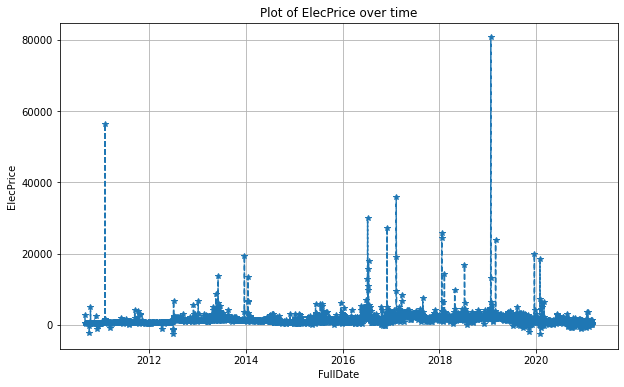

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')
plt.title('Plot of ElecPrice over time')

In [12]:
#indexing the first 2757 rows of our data as train set
train_data = df_daily.iloc[:2757,:] 


In [13]:
# the last rows i.e 1077 rows are indexed as the test set
test_data = df_daily.iloc[2757:,:] 

In [14]:
from prophet import Prophet

In [15]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [16]:
df_train = train_data[['FullDate','ElecPrice']]
df_train.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [18]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [19]:
df_tests = test_data[['FullDate','ElecPrice']]
df_tests.head()

,FullDate,ElecPrice
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [20]:
df_tests = df_tests.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_tests.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [21]:
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/164s29wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/qxstxy1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99029', 'data', 'file=/tmp/tmpxoq6ia0h/164s29wp.json', 'init=/tmp/tmpxoq6ia0h/qxstxy1p.json', 'output', 'file=/tmp/tmpxoq6ia0h/prophet_modelq_z62omr/prophet_model-20221012180701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2676.996143,69.878809,4938.565976,2676.996143,2676.996143,-154.998045,-154.998045,-154.998045,9.713639,9.713639,9.713639,-164.711684,-164.711684,-164.711684,0.0,0.0,0.0,2521.998098
1,2018-03-21,2677.763256,323.888262,5090.917360,2677.763256,2677.763256,-2.581932,-2.581932,-2.581932,159.358259,159.358259,159.358259,-161.940191,-161.940191,-161.940191,0.0,0.0,0.0,2675.181324
2,2018-03-22,2678.530368,451.033847,5122.162415,2678.530368,2678.530368,95.506031,95.506031,95.506031,257.111039,257.111039,257.111039,-161.605008,-161.605008,-161.605008,0.0,0.0,0.0,2774.036399
3,2018-03-23,2679.297480,297.032063,5021.544309,2679.297480,2679.297480,-113.261636,-113.261636,-113.261636,50.277970,50.277970,50.277970,-163.539606,-163.539606,-163.539606,0.0,0.0,0.0,2566.035844
4,2018-03-24,2680.064592,-261.350801,4533.726865,2680.064592,2680.064592,-438.938009,-438.938009,-438.938009,-271.436963,-271.436963,-271.436963,-167.501046,-167.501046,-167.501046,0.0,0.0,0.0,2241.126584


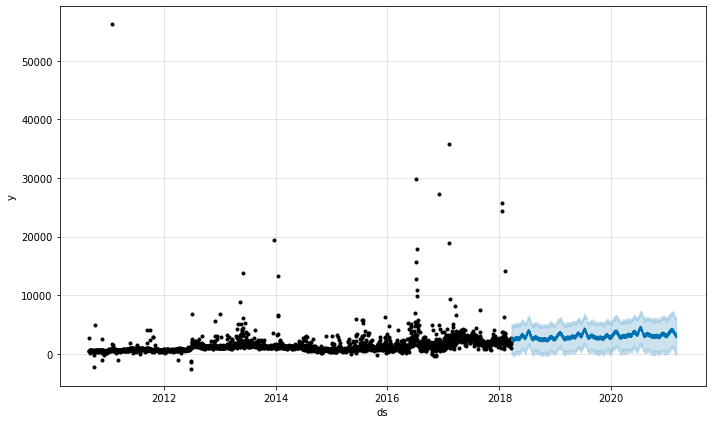

In [23]:
model.plot(forecast)
plt.show()

In [24]:
from sklearn import metrics

In [25]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [26]:
# question 14
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

the Mean Average Percentage Error ( MAPE) is: 539.22


In [27]:
# question 15 RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,2)

3196.64

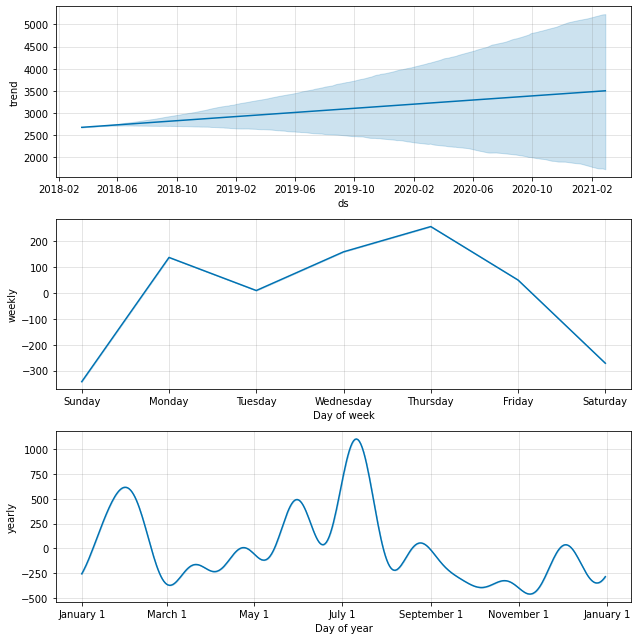

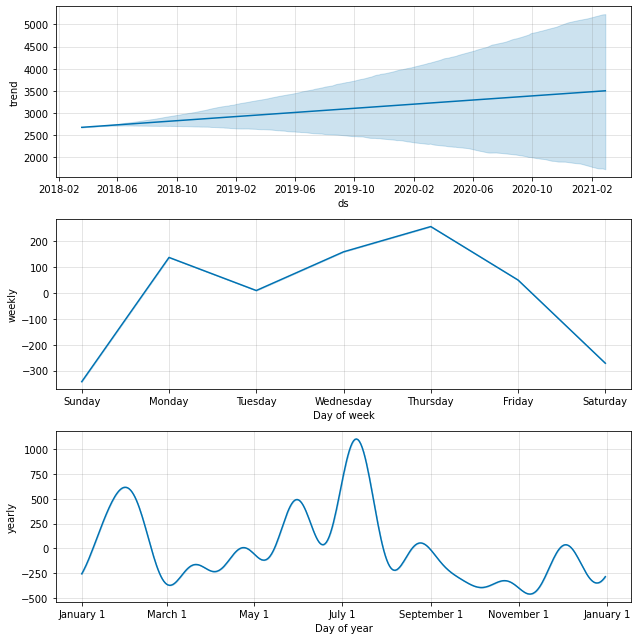

In [28]:
## question 16: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

model.plot_components(forecast)

In [29]:
df_daily.reset_index(inplace=True)

In [30]:
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [31]:
df_daily2 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'GasPrice':'add3','SysLoad':'add1',
                                           'Tmax':'add2'})

In [32]:

train2 = df_daily2.iloc[:2757,:]
test2 = df_daily2.iloc[2757:,:]
print(test2.shape)
print(train2.shape)

(1077, 5)
(2757, 5)


In [33]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [34]:
#fitting the model to train data
model = model.fit(train2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/cdtd70kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/h10x2mno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96267', 'data', 'file=/tmp/tmpxoq6ia0h/cdtd70kh.json', 'init=/tmp/tmpxoq6ia0h/h10x2mno.json', 'output', 'file=/tmp/tmpxoq6ia0h/prophet_modelx5gsopv0/prophet_model-20221012180900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
#making prediction with test set
prediction = model.predict(test2)

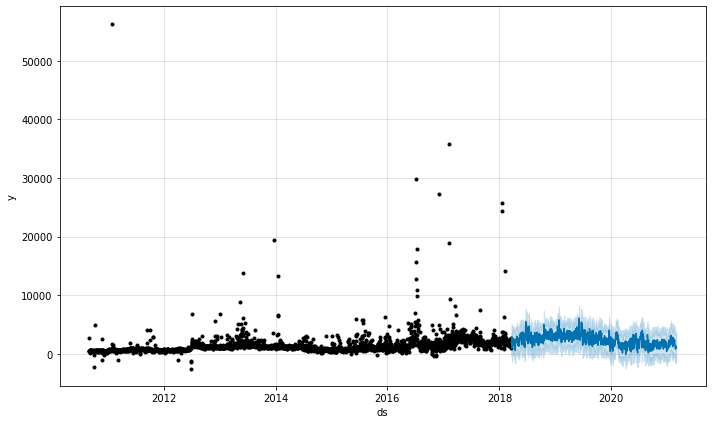

In [36]:
model.plot(prediction)
plt.show()

In [37]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [38]:
## question 17:Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
MAPE = Metric(test2['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:232.43


In [39]:
# question 18: RMSE
RMSE = np.sqrt(metrics.mean_squared_error(test2['y'],prediction['yhat']))
RMSE
round(RMSE,2)

2708.17

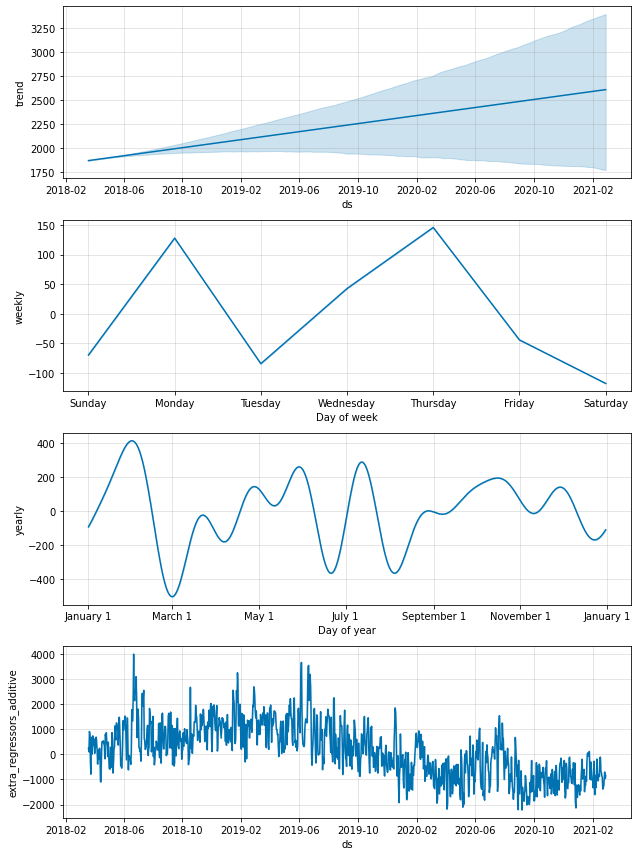

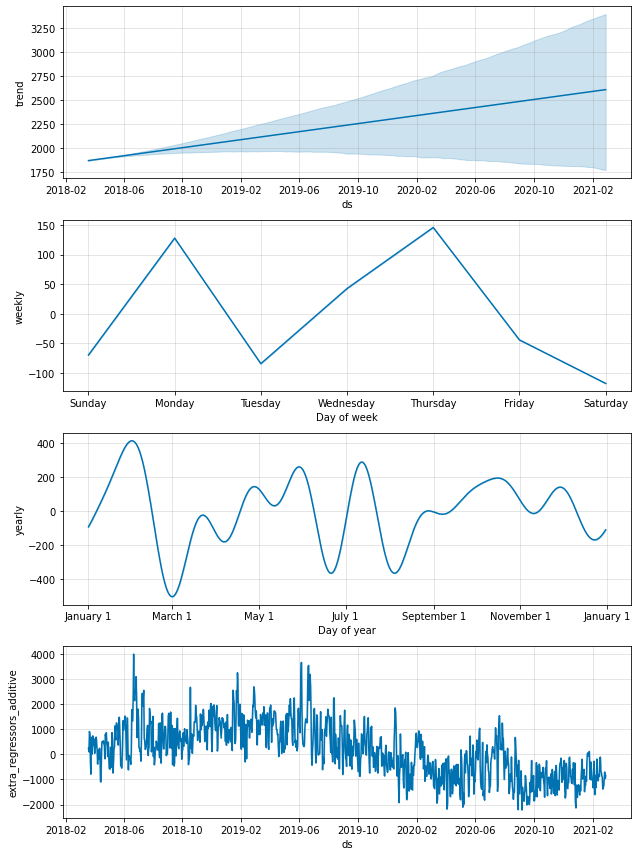

In [40]:
# question 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

model.plot_components(prediction)

In [41]:
df_daily3 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'GasPrice':'add3','SysLoad':'add1'})

In [42]:
train3 = df_daily3.iloc[:2757,:]
test3 = df_daily3.iloc[2757:,:]
print(test3.shape)
print(train3.shape)

(1077, 5)
(2757, 5)


In [43]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')

In [44]:
#fitting the model to train data
model = model.fit(train3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/xnkdldpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxoq6ia0h/1rbpebu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55690', 'data', 'file=/tmp/tmpxoq6ia0h/xnkdldpg.json', 'init=/tmp/tmpxoq6ia0h/1rbpebu5.json', 'output', 'file=/tmp/tmpxoq6ia0h/prophet_modelskccalk3/prophet_model-20221012181013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
#making prediction with test set
prediction = model.predict(test3)

In [46]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [47]:
## question 20:Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

##What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?
MAPE = Metric(test3['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:232.38
